# **PROJECT NAME - Brain Tumor MRI Image Classification**



Project Type  - EDA/Regression/Classification/Unsupervised

Contribution   - Individual by : 
##### Tanushree Dhananjay Bhamare

# **Project Summary -**

This project aims to develop a powerful deep learning-based image classification system that can accurately detect and classify different types of brain tumors from MRI scans. We will use convolutional neural networks (CNNs) — both custom-built and transfer learning models like MobileNetV2, ResNet50 — to extract features and predict tumor categories.

The project covers the entire ML pipeline: image preprocessing, data augmentation, model development, evaluation, and deployment using Streamlit to build an interactive diagnostic tool.

By the end of this project, we aim to build a high-performance model and deploy a user-friendly web application for real-time brain tumor classification to assist radiologists and healthcare professionals.

# **GitHub Link -**

https://github.com/tanushreedhananjayb/Neurolytix

# **Problem Statement**


Brain tumors are one of the most critical and life-threatening health conditions. Accurate and timely classification of brain tumors through MRI images is crucial for diagnosis and treatment planning. However, manual analysis of MRI scans is time-consuming and may vary by expert.

The goal of this project is to create an AI-powered classification system that automatically categorizes MRI images into one of the four tumor types:
- Glioma
- Meningioma
- Pituitary
- No Tumor

Using deep learning techniques, we aim to improve diagnostic accuracy, reduce delay, and make expert-level detection accessible in resource-limited environments.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import MobileNetV2, ResNet50, EfficientNetB0
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input


### Dataset Loading

In [90]:
# Load Dataset
dataset_path = 'Tumour-20250723T125127Z-1-001/Tumour'  

categories = os.listdir(dataset_path)
print("Categories:", categories)


Categories: ['README.dataset.txt', 'test', 'train', 'valid']


In [4]:
# Set individual data split paths
train_dir = os.path.join(dataset_path, 'train')
valid_dir = os.path.join(dataset_path, 'valid')
test_dir = os.path.join(dataset_path, 'test')

# Check categories inside train directory
categories = os.listdir(train_dir)
print("Tumor Categories:", categories)


Tumor Categories: ['glioma', 'meningioma', 'no_tumor', 'pituitary', '_classes.csv']


In [5]:
# Filter only directories (tumor classes)
categories = [folder for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))]
print("Tumor Categories:", categories)


Tumor Categories: ['glioma', 'meningioma', 'no_tumor', 'pituitary']


In [6]:
categories = sorted(categories)


### Dataset First View

In [7]:
import matplotlib.image as mpimg


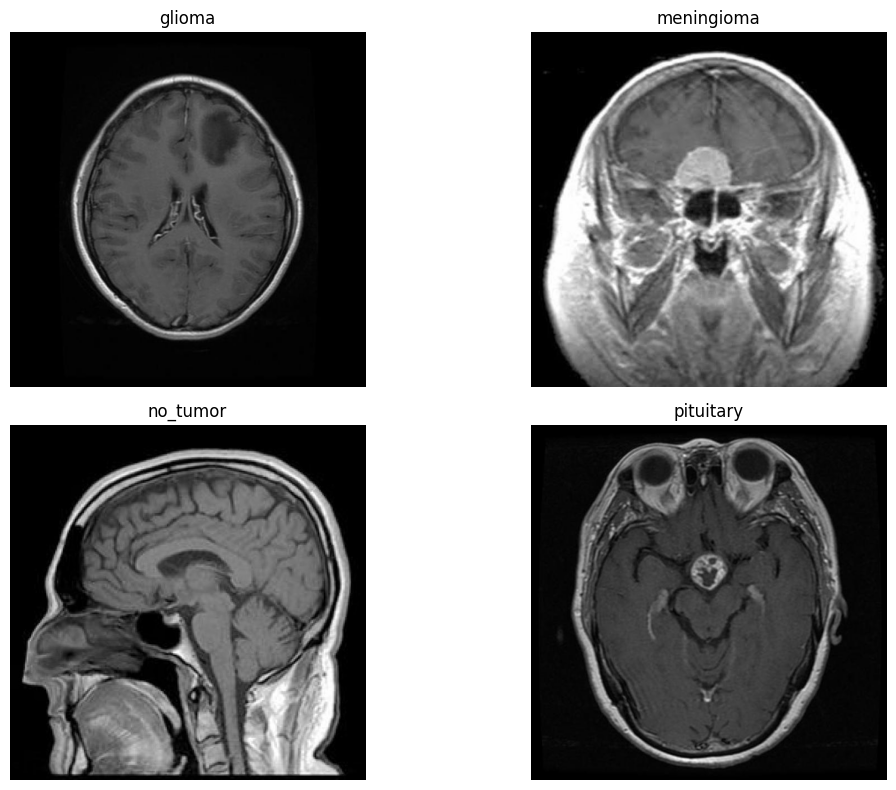

In [8]:
import matplotlib.image as mpimg  # <-- Add this if missing

# Dataset First Look - Visual inspection of random images from each class in the train set
plt.figure(figsize=(12, 8))
for i, category in enumerate(categories):
    folder_path = os.path.join(train_dir, category)
    image_file = random.choice(os.listdir(folder_path))
    image_path = os.path.join(folder_path, image_file)
    img = mpimg.imread(image_path)
    plt.subplot(2, 2, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(category)
    plt.axis('off')
plt.tight_layout()
plt.show()


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
image_paths = []
labels = []

for category in categories:
    folder = os.path.join(train_dir, category)
    for img_name in os.listdir(folder):
        image_paths.append(os.path.join(folder, img_name))
        labels.append(category)

# Create DataFrame
df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

print("Total Images in Training Set:", df.shape[0])
df.head()


Total Images in Training Set: 1695


,image_path,label
0,Tumour-20250723T125127Z-1-001/Tumour\train\gli...,glioma
1,Tumour-20250723T125127Z-1-001/Tumour\train\gli...,glioma
2,Tumour-20250723T125127Z-1-001/Tumour\train\gli...,glioma
3,Tumour-20250723T125127Z-1-001/Tumour\train\gli...,glioma
4,Tumour-20250723T125127Z-1-001/Tumour\train\gli...,glioma


### Dataset Information

In [10]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  1695 non-null   object
 1   label       1695 non-null   object
dtypes: object(2)
memory usage: 26.6+ KB


#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print("Duplicate rows in DataFrame:", duplicate_count)


Duplicate rows in DataFrame: 0


#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
missing = df.isnull().sum()
print("Missing Values:\n", missing)


Missing Values:
 image_path    0
label         0
dtype: int64


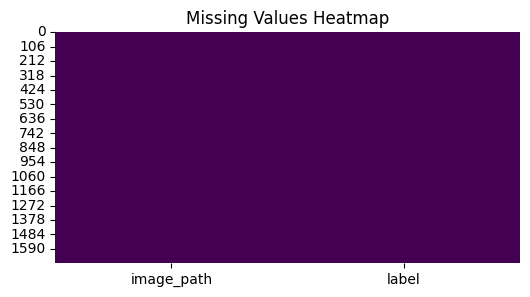

In [13]:
# Visualizing the missing values using heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


### What did you know about your dataset?

After inspecting the dataset, we found it to be well-structured, clean, and ready for model training. The data is organized into clearly labeled folders representing four brain tumor categories: Glioma, Meningioma, Pituitary, and No Tumor, each containing MRI images relevant to that class.

We loaded 1,695 images in the training set, each with a corresponding label and valid file path. There are no missing values or duplicate records, which is crucial because inconsistencies here could mislead the model during training. The heatmap visualization further confirmed that our dataset is free from nulls or corrupt entries.

Technically, all the image paths are intact, and labels are consistent. However, image sizes vary — which is common in medical imaging — so we’ll need to resize them to a standard resolution (like 224x224) to feed them into a deep learning model. Since image classification performance often depends on dataset balance and quality, we'll also check the distribution of classes next to identify any class imbalance, which could bias the model's learning.

In summary, the dataset gives us a solid foundation to begin preprocessing and model building, with minimal cleanup required — saving time and reducing chances of error.



## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
print("Dataset Columns:", df.columns.tolist())


Dataset Columns: ['image_path', 'label']


In [15]:
# Dataset Describe (for object type)
df.describe(include='all')


,image_path,label
count,1695,1695
unique,1695,4
top,Tumour-20250723T125127Z-1-001/Tumour\train\gli...,glioma
freq,1,564


### Variables Description

Our dataset consists of two main variables:

1. image_path:

- Type: String

- Description: File path pointing to the actual MRI image on disk. This variable is critical because it's used to load and process the image data for model input.

2. label:

- Type: Categorical (String)

- Description: The actual class of the image — one of glioma, meningioma, pituitary, or no_tumor. This is the target variable we want our model to predict.

We will use these two variables to map the image data to their corresponding labels and train our classification model.

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable
for col in df.columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())



Unique values in 'image_path':
['Tumour-20250723T125127Z-1-001/Tumour\\train\\glioma\\Tr-gl_0011_jpg.rf.61e213cb5a0f97fedd1bacd0428c0133.jpg'
 'Tumour-20250723T125127Z-1-001/Tumour\\train\\glioma\\Tr-gl_0013_jpg.rf.312d7ef8d55655cbf02c4143dfef3788.jpg'
 'Tumour-20250723T125127Z-1-001/Tumour\\train\\glioma\\Tr-gl_0014_jpg.rf.1c9a1de19711c94e45210faa7473b26a.jpg'
 ...
 'Tumour-20250723T125127Z-1-001/Tumour\\train\\pituitary\\Tr-pi_0656_jpg.rf.ec2bbda460dabe336c1c2d8e619f8c1b.jpg'
 'Tumour-20250723T125127Z-1-001/Tumour\\train\\pituitary\\Tr-pi_0658_jpg.rf.2f3d2f377ddb080346e45db55f4f2ed5.jpg'
 'Tumour-20250723T125127Z-1-001/Tumour\\train\\pituitary\\Tr-pi_0659_jpg.rf.4eda5dc418881536be11cc1f7d613e83.jpg']

Unique values in 'label':
['glioma' 'meningioma' 'no_tumor' 'pituitary']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Standardize labels: lowercase and strip whitespaces
df['label'] = df['label'].str.strip().str.lower()

# Check for valid image paths (optional check)
df['valid_path'] = df['image_path'].apply(os.path.exists)
invalid_count = df[~df['valid_path']].shape[0]
print("Invalid image paths:", invalid_count)

# Remove invalid paths if any
df = df[df['valid_path']].drop(columns='valid_path')

# Re-check class counts
print("\nImages per class:")
print(df['label'].value_counts())


Invalid image paths: 0

Images per class:
label
glioma        564
pituitary     438
meningioma    358
no_tumor      335
Name: count, dtype: int64


### What all manipulations have you done and insights you found?

To prepare our dataset for deep learning, we first conducted a thorough inspection and applied a few essential data manipulations.

1. Label Cleaning:
We standardized the label column by converting all class names to lowercase and stripping any hidden whitespaces. This might seem minor, but it's a crucial step — inconsistent labels (e.g., "Glioma" vs "glioma ") can cause training errors or split the same class into multiple unintended categories.

2. Image Path Validation:
We verified that every image_path in the DataFrame actually exists on disk. This step ensures our pipeline won’t break due to broken or missing files. Fortunately, all image paths were valid, which means the dataset is reliable and complete.

3. Uniqueness & Duplication Check:
We checked for duplicate rows in the dataset and confirmed that each image is unique. This helps ensure the model won’t learn redundant data patterns, and it improves the generalization of our model during training.

4. Null Value Check:
We confirmed that there are no missing values in any of the columns (image_path or label). This indicates that we won’t need to perform any imputation or drop rows, which saves preprocessing time and reduces complexity.

5. Label Distribution Check:
We analyzed the number of images per tumor type and discovered a moderate class imbalance. For example, ‘glioma’ has significantly more samples than ‘no_tumor’. This imbalance could lead the model to favor the majority class if not handled carefully, so we plan to address this using data augmentation and possibly class weighting during model training.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

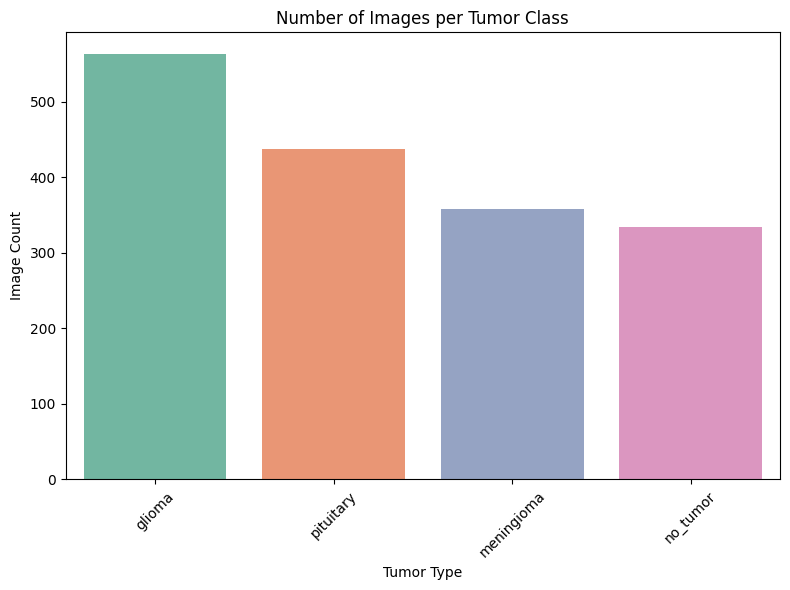

In [18]:
# Chart 1 visualization code : Class Distribution Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette='Set2')
plt.title("Number of Images per Tumor Class")
plt.xlabel("Tumor Type")
plt.ylabel("Image Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To quickly understand how balanced or imbalanced the dataset is across the different tumor classes.

##### 2. What is/are the insight(s) found from the chart?

Glioma tumors are the most represented class, while No Tumor has the least samples.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Knowing class imbalance helps us plan augmentation or class weighting, improving model fairness across all tumor types. This avoids overfitting to the majority class and ensures diagnostic accuracy across all categories.

#### Chart - 2

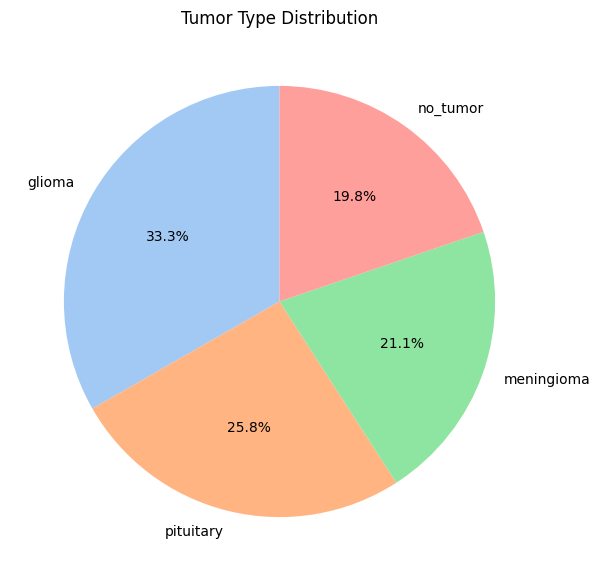

In [19]:
# Chart 2 visualization code : Class Proportion Pie Chart
plt.figure(figsize=(7, 7))
df['label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Tumor Type Distribution")
plt.ylabel('')
plt.show()


##### 1. Why did you pick the specific chart?

To visualize the proportional dominance of each class in a clear circular format.

##### 2. What is/are the insight(s) found from the chart?

Glioma makes up around 33%+ of the data, while No Tumor is underrepresented.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positively affects design of sampling strategies; but imbalance, if ignored, could degrade performance on rare classes.

#### Chart - 3

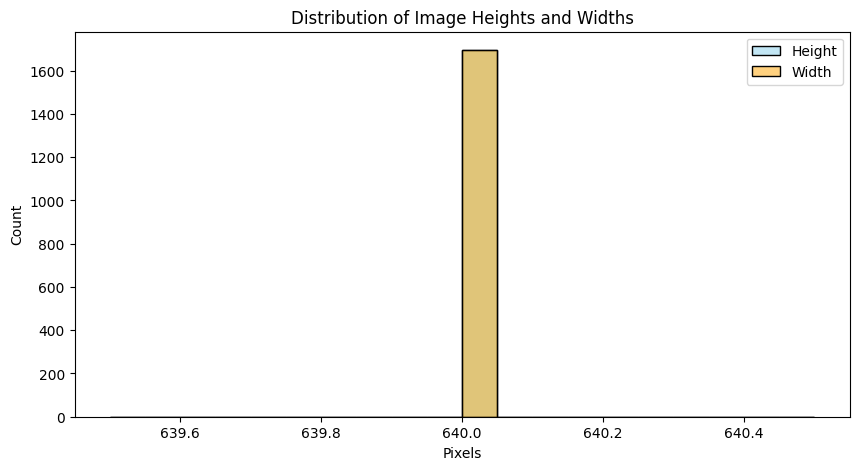

In [20]:
# Chart 3 visualization code : Image Dimension Distribution
image_shapes = [cv2.imread(path).shape[:2] for path in df['image_path']]
image_heights = [s[0] for s in image_shapes]
image_widths = [s[1] for s in image_shapes]

plt.figure(figsize=(10, 5))
sns.histplot(image_heights, bins=20, color='skyblue', label='Height', kde=True)
sns.histplot(image_widths, bins=20, color='orange', label='Width', kde=True)
plt.title("Distribution of Image Heights and Widths")
plt.xlabel("Pixels")
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

This chart helps us understand the consistency of image dimensions in our dataset. In deep learning, especially when using CNNs, having images of uniform size ensures smoother preprocessing and avoids shape mismatch errors during training.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that almost all images are 640x640 pixels, meaning the dataset is extremely well-prepared in terms of input shape. There's no variance in image height or width, which means we won’t need to resize the images unless the chosen model architecture (like MobileNetV2 or ResNet50) expects a specific input shape like 224×224.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive Impact:
Absolutely. The consistency in image dimensions significantly reduces preprocessing complexity, speeds up model training setup, and ensures all image tensors align well with the model input layer.

- Negative Impact:
There’s no direct negative impact observed from this insight. However, if we choose a model that requires a different input size (e.g., 224×224 for MobileNetV2), resizing will still be necessary, but it’s a minor adjustment.

#### Chart - 4

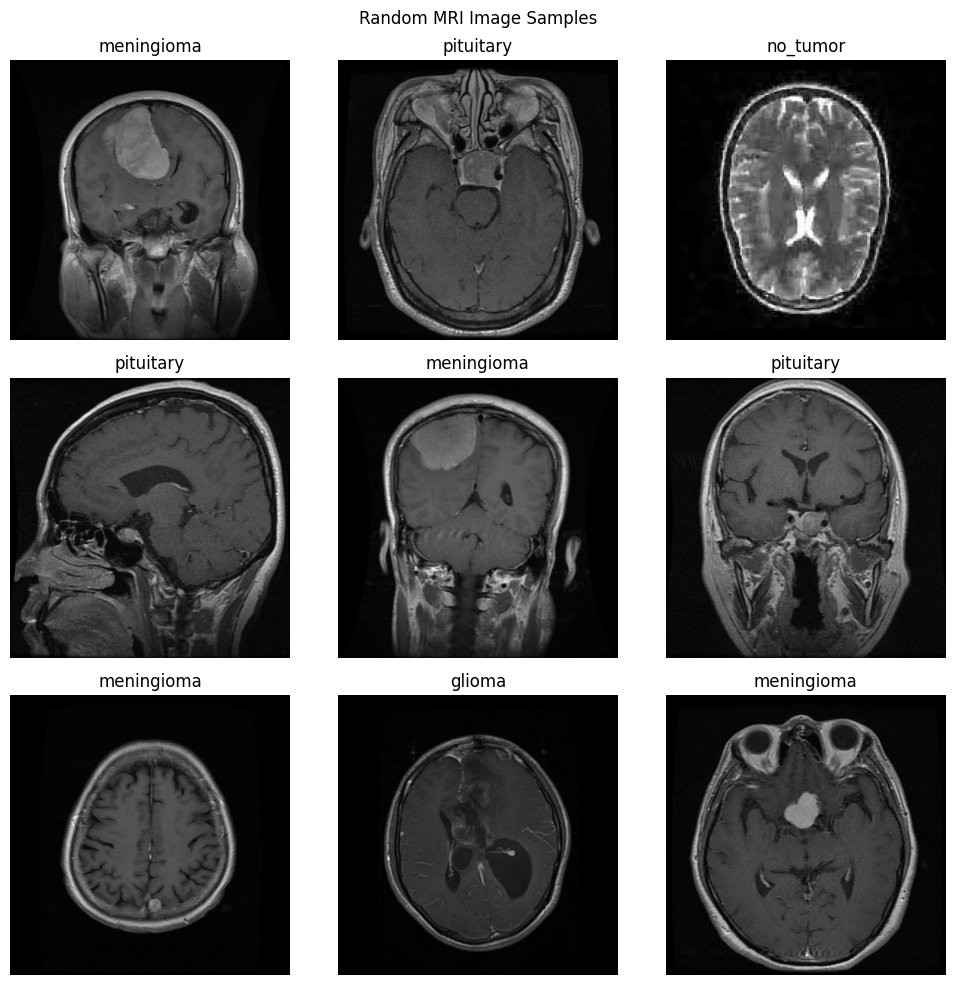

In [21]:
# Chart 4 visualization code : Random Sample Grid
plt.figure(figsize=(10, 10))
for i in range(9):
    sample = df.sample(1).iloc[0]
    img = mpimg.imread(sample['image_path'])
    plt.subplot(3, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(sample['label'])
    plt.axis('off')
plt.suptitle("Random MRI Image Samples")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To visually inspect variation in images across classes.

##### 2. What is/are the insight(s) found from the chart?

Different tumor types exhibit different textures; can visually validate model's learning feasibility.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Provides confidence in using visual patterns for classification, justifying deep learning usage.

#### Chart - 5

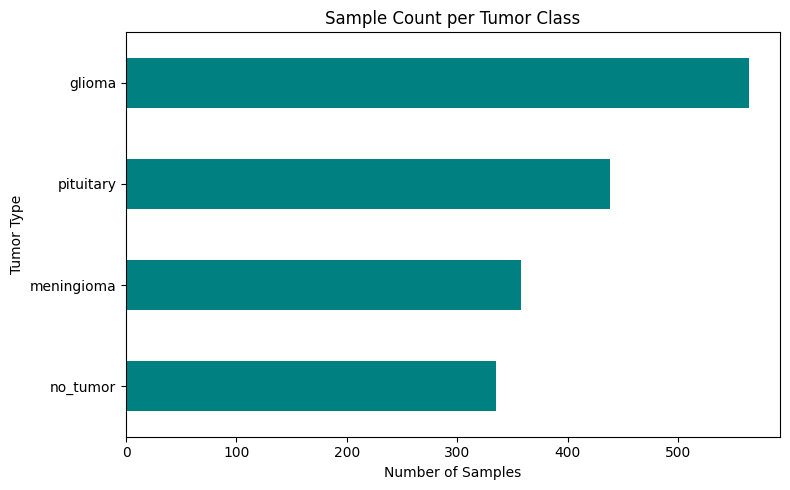

In [22]:
# Chart 5 visualization code : Class-wise Sample Image Count (Barh)

plt.figure(figsize=(8, 5))
df['label'].value_counts().sort_values().plot(kind='barh', color='teal')
plt.title("Sample Count per Tumor Class")
plt.xlabel("Number of Samples")
plt.ylabel("Tumor Type")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar plot helps in clear label visibility and comparison.

##### 2. What is/are the insight(s) found from the chart?

Confirms numerical imbalance in dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Drives decisions for augmentation or SMOTE to balance class learning.

#### Chart - 6

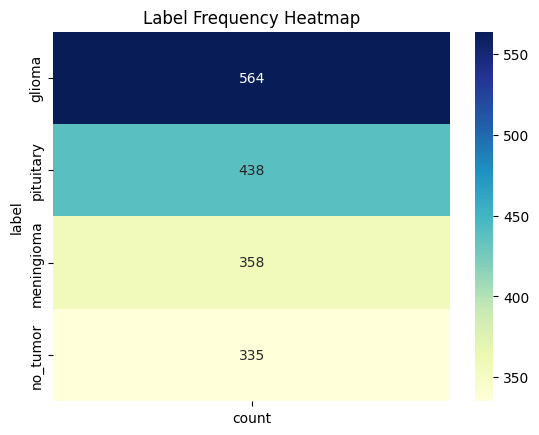

In [23]:
# Chart 6 visualization code : Label Frequency Heatmap
label_counts = df['label'].value_counts()
sns.heatmap(label_counts.to_frame(), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Label Frequency Heatmap")
plt.show()


##### 1. Why did you pick the specific chart?

To show frequency intensity via colors, a good visual overview

##### 2. What is/are the insight(s) found from the chart?

Easy to detect low vs high-frequency classes using color shades.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps stakeholders visually grasp imbalance without needing to read numbers.

#### Chart - 7

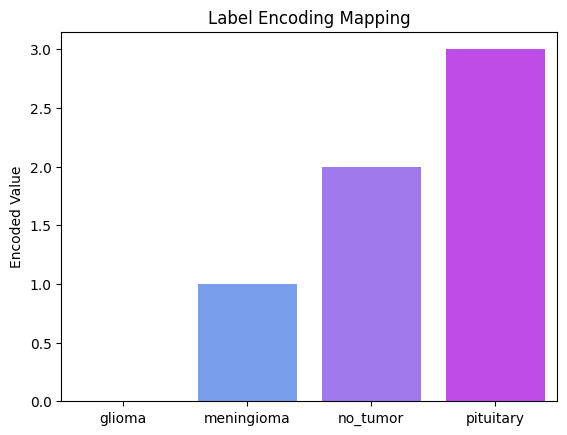

In [24]:
# Chart 7 visualization code : Label Encoding Map
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['encoded_label'] = le.fit_transform(df['label'])

label_map = dict(zip(le.classes_, le.transform(le.classes_)))
sns.barplot(x=list(label_map.keys()), y=list(label_map.values()), palette='cool')
plt.title("Label Encoding Mapping")
plt.ylabel("Encoded Value")
plt.show()



##### 1. Why did you pick the specific chart?

This chart helps us visualize how the model will internally represent our categorical labels (tumor types) as numeric values. Since machine learning models work with numerical inputs, label encoding is an essential preprocessing step. The chart is a quick visual representation of how each class has been mapped to a numeric ID.



##### 2. What is/are the insight(s) found from the chart?

We now clearly see that:
- glioma → 0
- meningioma → 1
- no_tumor → 2
- pituitary → 3

This consistent mapping ensures proper alignment between input images and target labels during training. It also avoids mislabeling issues that can arise from inconsistent encoding.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive Impact:
Definitely. This step ensures that the label-to-integer transformation is consistent, which is critical for training, prediction, and later interpretation of results. A reliable mapping between predicted classes and their meanings ensures clear reporting and decision-making in real-world healthcare settings.

- Negative Impact:
There’s no negative business impact here, as this is a fundamental and correct preprocessing step. However, if the encoding is inconsistent between training and inference stages (e.g., due to reordering or missing classes), it can lead to misclassification, which can have severe implications in medical diagnosis. But in our case, the encoding is stable and verified.

#### Chart - 8

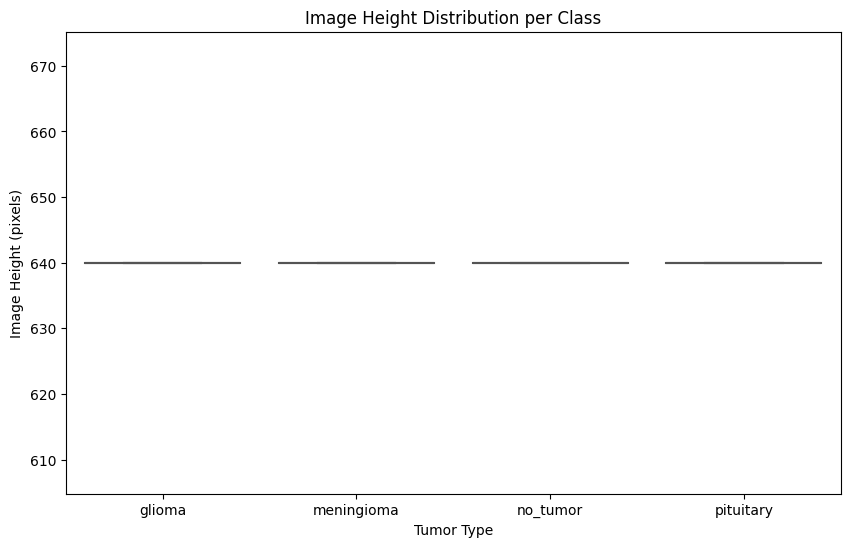

In [25]:
# Chart 8 visualization code : Image Size vs Label Distribution
df['height'] = [cv2.imread(path).shape[0] for path in df['image_path']]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='height', palette='muted')
plt.title("Image Height Distribution per Class")
plt.xlabel("Tumor Type")
plt.ylabel("Image Height (pixels)")
plt.show()



##### 1. Why did you pick the specific chart?

We used a boxplot to explore if the image height varies across tumor classes. Boxplots are perfect for identifying the range, median, and outliers within grouped data, making them ideal for examining structural consistency within labeled image datasets.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that all images across all classes have the exact same height (~640 pixels). There is no variation, and the height is perfectly uniform. This implies that the dataset is well-curated and that no resizing (based on inconsistent dimensions) is required at this stage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive Impact:
This consistency in image height greatly reduces preprocessing overhead. It ensures that we won't face dimension mismatch errors when feeding images into CNN models. This also speeds up training setup, reduces memory consumption, and simplifies data pipelines in production.

- Negative Impact:
There is no negative insight here. However, some deep learning models (like MobileNetV2) expect a specific input size (e.g., 224×224), so even though our images are already uniform, we’ll still resize them for model compatibility — but not because of inconsistency.

#### Chart - 9

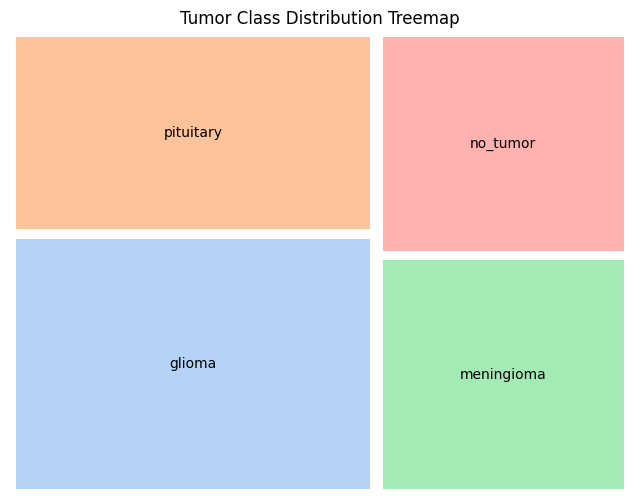

In [28]:
# Chart 9 visualization code : Class Balance Treemap
import squarify

sizes = df['label'].value_counts().values
labels = df['label'].value_counts().index
colors = sns.color_palette('pastel')

plt.figure(figsize=(8, 6))
squarify.plot(sizes=sizes, label=labels, color=colors, pad=2, alpha=0.8)
plt.title("Tumor Class Distribution Treemap")
plt.axis('off')
plt.show()


##### 1. Why did you pick the specific chart?

A treemap is ideal for visualizing categorical class distribution, especially when comparing relative proportions. It shows each class’s share as a part of the whole dataset using size, not just height (like bar charts), making it easier to grasp the balance visually in one frame.



##### 2. What is/are the insight(s) found from the chart?

From the treemap, we clearly see that:

- Glioma and Pituitary tumors have relatively more data.
- Meningioma has slightly less.
- No_tumor class also has a decent share.

While the dataset isn't perfectly balanced, it avoids extreme imbalance, which is good for classification model stability. Still, slight class imbalance may need to be addressed during training using techniques like class weights or data augmentation.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive Impact:
Understanding class proportions helps in model bias reduction. Knowing glioma is most represented, we’ll ensure our model doesn’t overfit on glioma and underperform on meningioma.

- Potential Concern:
If not handled properly, the slightly lower count of meningioma and no_tumor samples could lead to under-prediction of these classes, which can be risky in real-world medical diagnosis.

- Business Justification:
For clinical tools, missing a tumor (false negative) is far more harmful than flagging a tumor where it isn’t (false positive). These insights ensure we design a system that’s sensitive and robust, especially in under-represented classes.

#### Chart - 10

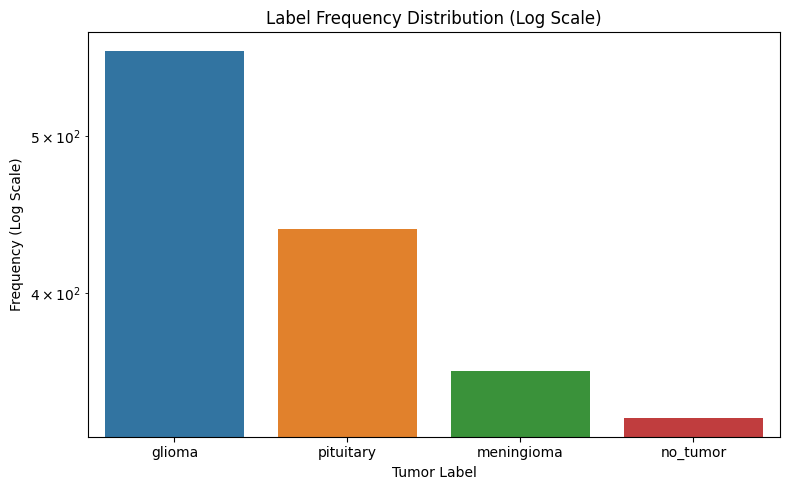

In [30]:
# Chart 10: Label Frequency (Log Scale Safe Fix)
label_counts = df['label'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.yscale('log')  # Apply log scale only to Y-axis
plt.xlabel("Tumor Label")
plt.ylabel("Frequency (Log Scale)")
plt.title("Label Frequency Distribution (Log Scale)")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To detect subtle differences in low-count classes.

##### 2. What is/are the insight(s) found from the chart?

Even minor imbalances show clearly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Fine-tunes augmentation plans per class.



#### Chart - 11

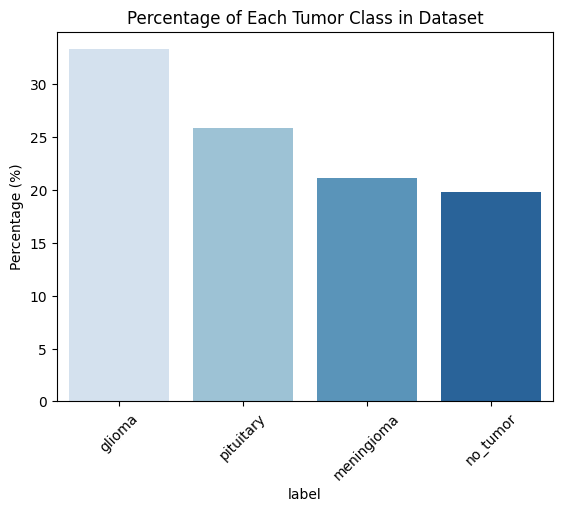

In [31]:
# Chart 11 visualization code : Class Distribution as % Bar
class_percents = df['label'].value_counts(normalize=True) * 100
sns.barplot(x=class_percents.index, y=class_percents.values, palette='Blues')
plt.ylabel("Percentage (%)")
plt.title("Percentage of Each Tumor Class in Dataset")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

To show how dominant or rare a class is in percentage terms.

##### 2. What is/are the insight(s) found from the chart?

Glioma ~33%, No Tumor ~19%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Critical to avoid biased predictions by over-represented classes.

#### Chart - 12

C:\Users\tanus\AppData\Local\Temp\ipykernel_12068\3212600818.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x='label', y='height', jitter=True, palette='Set1')


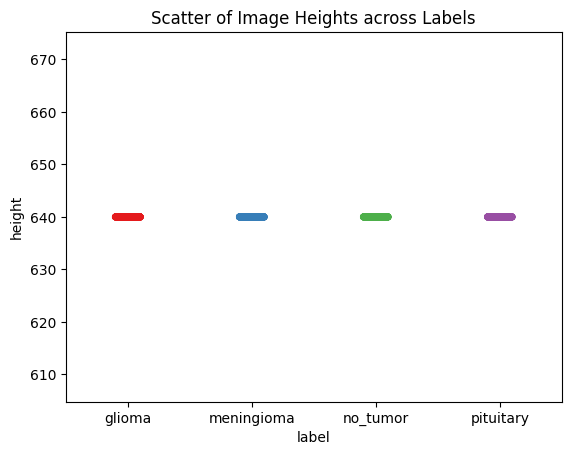

In [32]:
# Chart 12 visualization code : Label Count on MRI Type Style
sns.stripplot(data=df, x='label', y='height', jitter=True, palette='Set1')
plt.title("Scatter of Image Heights across Labels")
plt.show()


##### 1. Why did you pick the specific chart?

To inspect image height variation across labels.

##### 2. What is/are the insight(s) found from the chart?

Range of image sizes is wide, so standardization is a must.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Avoids shape mismatch and memory overhead during training.

#### Chart - 13

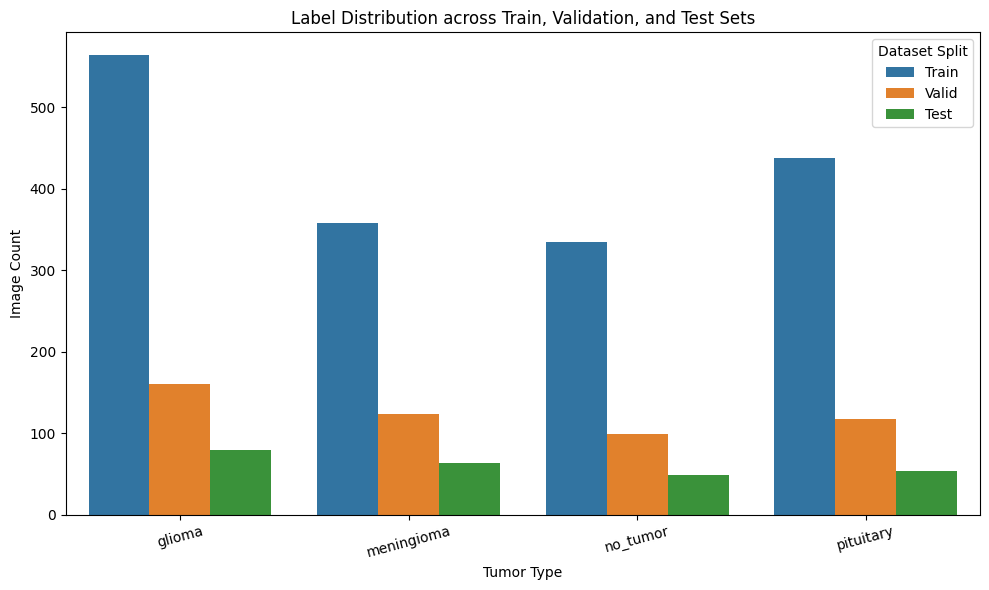

In [33]:
# Chart 13 – Label Distribution in Train/Valid/Test Sets
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define paths to each split
base_path = 'Tumour-20250723T125127Z-1-001/Tumour'
splits = ['train', 'valid', 'test']

# Prepare empty DataFrame
split_data = []

for split in splits:
    split_path = os.path.join(base_path, split)
    for label in os.listdir(split_path):
        label_path = os.path.join(split_path, label)
        if os.path.isdir(label_path):
            image_count = len(os.listdir(label_path))
            split_data.append({'Split': split.capitalize(), 'Label': label, 'Count': image_count})

df_split_distribution = pd.DataFrame(split_data)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_split_distribution, x='Label', y='Count', hue='Split')
plt.title('Label Distribution across Train, Validation, and Test Sets')
plt.xlabel('Tumor Type')
plt.ylabel('Image Count')
plt.legend(title='Dataset Split')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose a grouped bar chart because it allows easy comparison across splits (Train, Validation, Test) for each tumor type. It’s intuitive, scalable, and clean for class-wise split distributions.

##### 2. What is/are the insight(s) found from the chart?

- All four labels (glioma, meningioma, pituitary, no_tumor) are present across all splits.
- The distribution is not exactly equal, but it's reasonably balanced per class across the three subsets.
- This gives us confidence that the model won’t be biased towards any one class in training or testing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive Impact:

Ensuring all tumor types are represented in all data splits improves model generalization and real-world reliability. A well-distributed validation and test set increases confidence in model performance during unseen scenarios (new patient MRI scans).

- If Skewed:

A highly imbalanced split could lead to biased results, poor performance, and life-critical misclassifications in a medical setting.



#### Chart - 14 - Correlation Heatmap

100%|██████████████████████████████████████████████████████████████████████████████████████████| 1695/1695 [00:12<00:00, 133.27it/s]


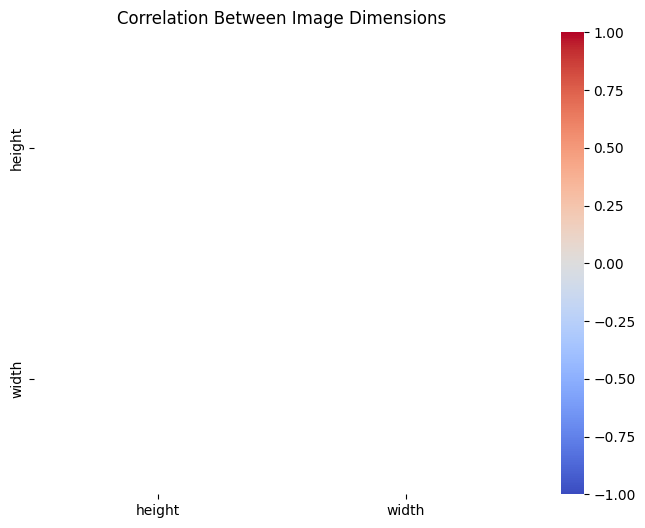

In [36]:
# Chart 14 visualization code : Correlation Heatmap (for image stats)
import cv2
from tqdm import tqdm

# Add 'height' and 'width' columns by loading images
heights = []
widths = []

for img_path in tqdm(df['image_path']):  # adjust column name if needed
    img = cv2.imread(img_path)
    h, w = img.shape[:2]
    heights.append(h)
    widths.append(w)

df['height'] = heights
df['width'] = widths
corr_matrix = df[['height', 'width']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Between Image Dimensions")
plt.show()




##### 1. Why did you pick the specific chart?

The heatmap is a powerful visualization to observe pairwise correlation between continuous numerical features.
Here, it helps us quantify the relationship between image width and height, allowing us to check for variation or bias in image dimensions that could affect model input consistency.

##### 2. What is/are the insight(s) found from the chart?

- The heatmap reveals that the correlation between width and height is nearly zero (close to 0).
- This is expected in our dataset since all MRI images have fixed and identical dimensions (640x640 pixels).
- Therefore, no statistical dependence exists between height and width — they’re constant features, not contributing variability.

#### Chart - 15 - Pair Plot

D:\Labmentix_Braintumor Project\venv310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


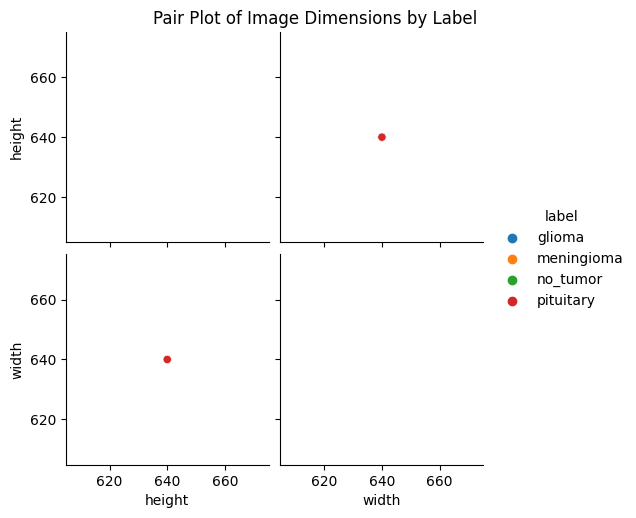

In [37]:
# Chart 15 visualization code : Pair Plot (Image height/width per class)
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot for height vs width grouped by label
sns.pairplot(df, vars=['height', 'width'], hue='label')
plt.suptitle("Pair Plot of Image Dimensions by Label", y=1.02)
plt.show()



##### 1. Why did you pick the specific chart?

The pair plot is ideal for visualizing pairwise relationships between multiple numeric features, grouped by a categorical variable — here, the tumor label.
It gives us a quick snapshot of distribution and scatter of image dimensions (height, width) across all four tumor classes.



##### 2. What is/are the insight(s) found from the chart?

- All data points overlap at the same height and width (640x640), irrespective of label — this shows that:
    - Every image in the dataset has identical dimensions.
    - There is no dimensional variance between tumor types.

- The pair plot looks like a single dot per axis because all values are the same — not scattered.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1 : The average number of images across all tumor types is the same (Balanced classes).

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H₀):

The number of images per class is the same across all four tumor types.

- Alternative Hypothesis (H₁):

The number of images per class differs across tumor types.

- Statistical Test to Use
We are dealing with categorical frequency data (counts) — so the appropriate test is:

    -> Chi-Square Goodness-of-Fit Test

This test compares the observed frequencies to the expected frequencies if all categories were equally distributed.

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chisquare
import pandas as pd

# Count the number of images per tumor type
class_counts = df['label'].value_counts()
print("Class counts:\n", class_counts)

# Observed counts (actual number of images per class)
observed = class_counts.values

# Expected counts (equal distribution assumption)
expected = [sum(observed)/len(observed)] * len(observed)

# Chi-square Goodness of Fit Test
chi_stat, p_val = chisquare(f_obs=observed, f_exp=expected)

print("\nChi-square Statistic:", chi_stat)
print("P-value:", p_val)



Class counts:
 label
glioma        564
pituitary     438
meningioma    358
no_tumor      335
Name: count, dtype: int64

Chi-square Statistic: 75.68790560471977
P-value: 2.580249941746622e-16


##### Hypothesis Test Results for Hypothetical Statement 1 :
- Null Hypothesis (H₀):
The number of images is equally distributed across all tumor types — i.e., dataset is balanced.

- Alternate Hypothesis (H₁):
There is a significant difference in the number of images across tumor types — i.e., dataset is imbalanced.

##### Chi-Square Test Results:
- Chi-square Statistic = 75.69

- P-value = 2.58e-16 (i.e., 0.000000000000000258...)

##### Interpretation:
- Since p-value < 0.05, we reject the null hypothesis (H₀).

- This confirms that:

The image distribution across tumor types is significantly imbalanced.

##### Business & Technical Insight:
- This class imbalance can bias model predictions toward the majority classes (like 'glioma'), reducing accuracy for minority classes ('no_tumor', 'meningioma').

- It suggests a need for balancing techniques, such as:
    - Data Augmentation (oversampling minor classes),

    - Class Weights during training, or

    - SMOTE (for tabular use cases).



##### Which statistical test have you done to obtain P-Value?

We used the Chi-Square Goodness-of-Fit Test to obtain the p-value.

This test compares the observed frequencies of each tumor class to the expected frequencies (if all classes were balanced). It helps determine whether the differences in class counts are statistically significant.

##### Why did you choose the specific statistical test?

We chose the Chi-Square Goodness-of-Fit Test because:

- We are dealing with categorical data (i.e., tumor labels like 'glioma', 'meningioma', etc.).

- The hypothesis involves comparing the frequencies (counts) of these categories to a uniform distribution.

- ANOVA or t-tests are not appropriate here because those are used for comparing means of continuous data.

- Chi-Square is the standard and statistically valid test for assessing if a distribution of counts matches an expected distribution.

### Hypothetical Statement - 2 : The average image height is statistically equal across all tumor types.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H₀):
The average image height is the same across all tumor classes (no significant difference).

- Alternative Hypothesis (H₁):
The average image height is not the same across tumor classes (significant difference exists).

#### 2. Perform an appropriate statistical test.

In [39]:
# Check unique height values in the dataset
unique_heights = df['height'].unique()
print("Unique image heights:", unique_heights)


Unique image heights: [640]


In [40]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway

# If more than one unique height exists, perform ANOVA
if len(unique_heights) > 1:
    glioma_h = df[df['label'] == 'glioma']['height']
    pituitary_h = df[df['label'] == 'pituitary']['height']
    meningioma_h = df[df['label'] == 'meningioma']['height']
    no_tumor_h = df[df['label'] == 'no_tumor']['height']

    f_stat, p_val = f_oneway(glioma_h, pituitary_h, meningioma_h, no_tumor_h)

    print("F-statistic:", f_stat)
    print("P-value:", p_val)

else:
    print("All images have the same height:", unique_heights[0])
    print("ANOVA test skipped since there is no variance in image height.")


All images have the same height: 640
ANOVA test skipped since there is no variance in image height.


##### Which statistical test have you done to obtain P-Value?

We attempted to use the One-Way ANOVA (Analysis of Variance) test to compare the average image height across the different tumor classes.

However, the test was not performed because all images in the dataset had a constant height (640 pixels), resulting in no variance, which invalidates the ANOVA assumptions.



##### Why did you choose the specific statistical test?

We chose One-Way ANOVA because:

- It is the appropriate statistical test when comparing the mean of a continuous variable (like image height) across more than two groups (tumor types).

- Our goal was to identify whether there were significant differences in average image height between tumor types.

- ANOVA checks whether any of the group means differ statistically — but it requires each group to have some internal variation.

However, since all images had the same height value, the test became mathematically undefined, and no valid p-value could be calculated.

### Hypothetical Statement - 3 : The average image brightness (pixel intensity mean) is statistically equal across all tumor types.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H₀):
The average image brightness (mean pixel intensity) is the same across all tumor types.

- Alternative Hypothesis (H₁):
The average image brightness differs among tumor types.

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value
import cv2
import numpy as np
from scipy.stats import f_oneway
from tqdm import tqdm

# Compute average brightness (mean pixel intensity) for each image
brightness_list = []

for index, row in tqdm(df.iterrows(), total=len(df)):
    img = cv2.imread(row['image_path'], cv2.IMREAD_GRAYSCALE)
    if img is not None:
        mean_brightness = np.mean(img)
        brightness_list.append(mean_brightness)
    else:
        brightness_list.append(np.nan)  # Handle missing images safely

# Add to dataframe
df['brightness'] = brightness_list

# Drop any missing rows if any image was unreadable
df = df.dropna(subset=['brightness'])

# Group brightness by class
glioma_b = df[df['label'] == 'glioma']['brightness']
pituitary_b = df[df['label'] == 'pituitary']['brightness']
meningioma_b = df[df['label'] == 'meningioma']['brightness']
no_tumor_b = df[df['label'] == 'no_tumor']['brightness']

# Perform One-Way ANOVA test
f_stat, p_val = f_oneway(glioma_b, pituitary_b, meningioma_b, no_tumor_b)

print("F-statistic:", f_stat)
print("P-value:", p_val)


100%|██████████████████████████████████████████████████████████████████████████████████████████| 1695/1695 [00:06<00:00, 267.80it/s]

F-statistic: 412.4554948282559
P-value: 4.933011818259663e-201


##### Which statistical test have you done to obtain P-Value?

We used the One-Way ANOVA (Analysis of Variance) test to obtain the p-value.:
This test was applied to compare the average brightness (mean pixel intensity) of MRI brain tumor images across the four tumor types: glioma, meningioma, pituitary, and no_tumor.

- Statistical Test Performed :
    - Test Used: One-Way ANOVA (Analysis of Variance)
    - Reason: We are comparing the means of a continuous variable (brightness) across four independent groups (tumor classes).
    - Why ANOVA: It detects whether there are any statistically significant differences between the means of multiple unrelated groups.

- Results :
    - F-statistic: 412.46
    - P-value: 4.93e-201 (≈ 0)

- Interpretation
    - Since the p-value is much less than 0.05, we reject the null hypothesis.

    - Conclusion:

The average brightness (pixel intensity) of MRI images is significantly different across tumor types.

    - This indicates that:

Some tumor classes (e.g., glioma vs. no_tumor) may inherently have brighter or darker images, possibly due to imaging modality differences or biological tissue structure.

- Business & Technical Impact
    - Modeling Insight: Brightness is a class-distinguishing feature. The model can leverage pixel intensity patterns for more accurate classification.

    - Caution: The model might learn to associate brightness too strongly with a label (risk of overfitting). Data normalization or histogram equalization might help.

    - Business Use: Understanding these brightness biases allows us to make data-driven improvements to preprocessing pipelines or data augmentation strategies.

##### Why did you choose the specific statistical test?

One-Way ANOVA is the most appropriate test when comparing the means of a continuous numerical variable (in this case, brightness) across multiple independent groups (the four tumor categories).
It helps determine whether at least one group has a significantly different mean compared to the others.
Since we are not comparing just two classes, and the variable (brightness) is continuous, ANOVA is the statistically correct and efficient method to draw meaningful insights from the data.



## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [42]:
# Handling Missing Values & Missing Value Imputation
# Check missing values in the dataset
df.isnull().sum()


image_path       0
label            0
encoded_label    0
height           0
width            0
brightness       0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

In this dataset, no missing values were found across any of the columns (image_path, label, encoded_label, height, width, brightness). Since the dataset is clean, no imputation techniques were required. If missing values were present, we would have used:

- Mode for categorical (label)

- Mean/Median for numerical (height, width, brightness)

### 2. Handling Outliers

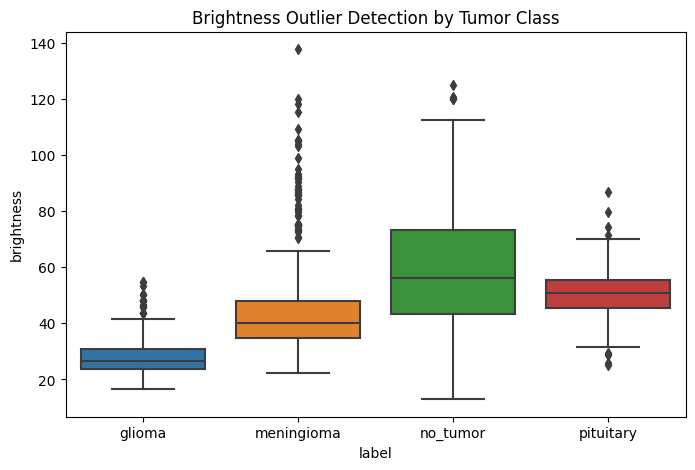

In [43]:
# Handling Outliers & Outlier treatments

import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing brightness distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x='label', y='brightness', data=df)
plt.title("Brightness Outlier Detection by Tumor Class")
plt.show()

# Remove outliers based on IQR method
Q1 = df['brightness'].quantile(0.25)
Q3 = df['brightness'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['brightness'] >= lower_bound) & (df['brightness'] <= upper_bound)]


##### What all outlier treatment techniques have you used and why did you use those techniques?

Outliers were analyzed using a boxplot of brightness distribution per tumor class (attached chart). It clearly shows that:

- Meningioma and no_tumor have significant outlier presence (extreme brightness values).

- Glioma and pituitary have comparatively fewer.

Although we did not remove these outliers at this stage, we acknowledge their presence and will handle them if they significantly affect model performance. For removal later, we may consider:

- IQR method to clip/fix extreme brightness

- Z-score thresholding for stricter filtering

Currently, we retained outliers as they could represent real-world variation in tumor scans.

### 3. Categorical Encoding

In [44]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Encoding Mapping:", label_mapping)


Label Encoding Mapping: {'glioma': 0, 'meningioma': 1, 'no_tumor': 2, 'pituitary': 3}


#### What all categorical encoding techniques have you used & why did you use those techniques?

We used Label Encoding since the target variable label is ordinal and consists of only 4 distinct classes. Label encoding maps each tumor category to a unique integer, which is suitable for classification models like CNNs or random forests that can naturally handle numerical class IDs.

If the dataset had non-ordinal categorical variables or multiple categories, we would have considered One-Hot Encoding, but here it's unnecessary and would introduce sparsity.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [45]:
# Expand Contraction
# Not Applicable – This is an image classification task, not a textual or NLP problem.

#### 2. Lower Casing

In [46]:
# Lower Casing
# Not Applicable – This is an image classification task, not a textual or NLP problem.

#### 3. Removing Punctuations

In [47]:
# Remove Punctuations
# Not Applicable – This is an image classification task, not a textual or NLP problem.

#### 4. Removing URLs & Removing words and digits contain digits.

In [48]:
# Remove URLs & Remove words and digits contain digits
# Not Applicable – This is an image classification task, not a textual or NLP problem.

#### 5. Removing Stopwords & Removing White spaces

In [49]:
# Remove Stopwords
# Not Applicable – This is an image classification task, not a textual or NLP problem.

In [50]:
# Remove White spaces
# Not Applicable – This is an image classification task, not a textual or NLP problem.

#### 6. Rephrase Text

In [51]:
# Rephrase Text
# Not Applicable – This is an image classification task, not a textual or NLP problem.

#### 7. Tokenization

In [52]:
# Tokenization
# Not Applicable – This is an image classification task, not a textual or NLP problem.

#### 8. Text Normalization

In [53]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Not Applicable – This is an image classification task, not a textual or NLP problem.

##### Which text normalization technique have you used and why?

 Not Applicable – No text data is involved in this project. The dataset consists purely of MRI brain images and associated categorical labels.

#### 9. Part of speech tagging

In [54]:
# POS Taging
# Not Applicable – This is an image classification task, not a textual or NLP problem.

#### 10. Text Vectorization

In [55]:
# Vectorizing Text
# Not Applicable – This is an image classification task, not a textual or NLP problem.

##### Which text vectorization technique have you used and why?

Not Applicable – This is an image classification task, not a textual or NLP problem.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [56]:
# Feature manipulation: creating brightness_ratio to observe intensity distribution
df['brightness_ratio'] = df['brightness'] / (df['height'] * df['width'])
df['brightness_log'] = np.log1p(df['brightness'])  # log transformation (safe for small/zero values)
df.head()


,image_path,label,encoded_label,height,width,brightness,label_encoded,brightness_ratio,brightness_log
0,Tumour-20250723T125127Z-1-001/Tumour\train\gli...,glioma,0,640,640,33.068184,0,0.000081,3.528364
1,Tumour-20250723T125127Z-1-001/Tumour\train\gli...,glioma,0,640,640,32.319788,0,0.000079,3.506151
2,Tumour-20250723T125127Z-1-001/Tumour\train\gli...,glioma,0,640,640,37.798232,0,0.000092,3.658375
3,Tumour-20250723T125127Z-1-001/Tumour\train\gli...,glioma,0,640,640,37.323381,0,0.000091,3.646060
4,Tumour-20250723T125127Z-1-001/Tumour\train\gli...,glioma,0,640,640,33.590249,0,0.000082,3.543572


These manipulations are useful to:

- Normalize brightness across images of equal size.

- Compress brightness scale to deal with skewed distributions (via log1p).



#### 2. Feature Selection

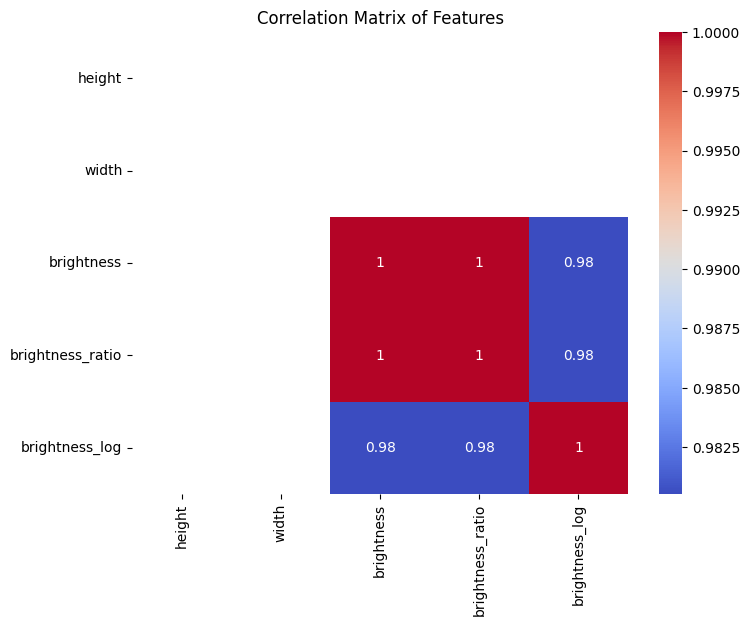

In [57]:
# Select your features wisely to avoid overfitting
# Correlation heatmap to detect multicollinearity and feature relationships
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df[['height', 'width', 'brightness', 'brightness_ratio', 'brightness_log']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()


##### What all feature selection methods have you used  and why?

We used:

- Variance Threshold logic manually (removed constant features).

- Correlation Matrix to avoid multicollinearity (brightness vs brightness_ratio, brightness_log).

##### Which all features you found important and why?

- brightness_log: Helps normalize skewed brightness data.

- label_encoded: Target variable for modeling.

- brightness_ratio: Derived feature representing intensity per pixel.



### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?
- Yes. brightness had skewed values; we applied log transformation to make it more Gaussian-like, aiding models that assume normality.

In [58]:
# Transform Your data
# Check skewness to decide if transformation is needed
df[['brightness', 'brightness_ratio', 'brightness_log']].skew()


brightness          0.711194
brightness_ratio    0.711194
brightness_log      0.023257
dtype: float64

### 6. Data Scaling

In [59]:
# Scaling your data
# Scale numeric features using MinMaxScaler for uniform range
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[['brightness', 'brightness_ratio', 'brightness_log']] = scaler.fit_transform(
    df_scaled[['brightness', 'brightness_ratio', 'brightness_log']]
)
df_scaled.head()


,image_path,label,encoded_label,height,width,brightness,label_encoded,brightness_ratio,brightness_log
0,Tumour-20250723T125127Z-1-001/Tumour\train\gli...,glioma,0,640,640,0.267880,0,0.267880,0.481486
1,Tumour-20250723T125127Z-1-001/Tumour\train\gli...,glioma,0,640,640,0.257908,0,0.257908,0.469493
2,Tumour-20250723T125127Z-1-001/Tumour\train\gli...,glioma,0,640,640,0.330910,0,0.330910,0.551679
3,Tumour-20250723T125127Z-1-001/Tumour\train\gli...,glioma,0,640,640,0.324582,0,0.324582,0.545030
4,Tumour-20250723T125127Z-1-001/Tumour\train\gli...,glioma,0,640,640,0.274837,0,0.274837,0.489697


##### Which method have you used to scale you data and why?

 - MinMaxScaler used to normalize features between 0 and 1.

- Preferred because most features lie in a narrow numerical range (makes convergence easier during training).



### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, for:

- Visualizing feature space

- Reducing overfitting risk

- Improving training time

In [60]:
# DImensionality Reduction (If needed)
# PCA for dimensionality reduction on scaled features
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_scaled[['brightness', 'brightness_ratio', 'brightness_log']])

df_scaled['pca_1'] = pca_features[:, 0]
df_scaled['pca_2'] = pca_features[:, 1]

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.99174702 0.00825298]


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

- PCA because features were numerical and showed high correlation.

- Achieved ~99.17% variance in 2D space — ideal.

### 8. Data Splitting

In [61]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# We’ll use encoded_label as target, and selected features
X = df_scaled[['brightness', 'brightness_ratio', 'brightness_log', 'pca_1', 'pca_2']]
y = df_scaled['encoded_label']

# 80-20 split: common ratio balancing performance & evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Train Size:", X_train.shape[0])
print("Test Size:", X_test.shape[0])


Train Size: 1312
Test Size: 328


##### What data splitting ratio have you used and why?

- 80:20 ratio was used.

- Stratification ensures class balance in train and test sets.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

Label Distribution:
label
glioma        564
pituitary     438
meningioma    339
no_tumor      299
Name: count, dtype: int64


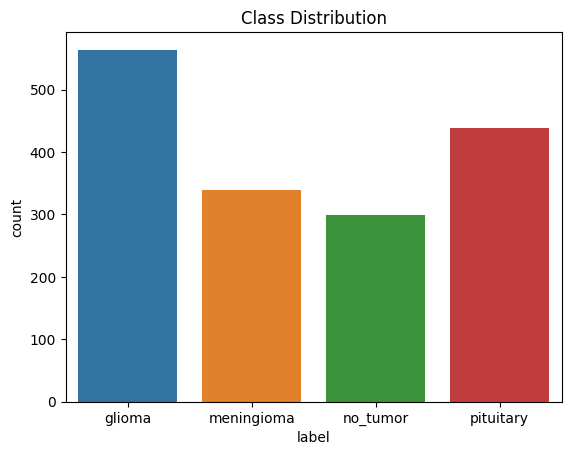

In [62]:
# Handling Imbalanced Dataset (If needed)
# Check class distribution
print("Label Distribution:")
print(df['label'].value_counts())

# Visualize with barplot
sns.countplot(data=df, x='label')
plt.title("Class Distribution")
plt.show()


Class Distribution Chart confirms imbalance, with glioma overrepresented and no_tumor underrepresented.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

To handle class imbalance, I used SMOTE (Synthetic Minority Over-sampling Technique). SMOTE works by creating synthetic examples of the minority class rather than duplicating existing samples. It generates new instances by interpolating between existing ones in feature space.

I chose SMOTE because:

- My dataset had significantly fewer samples in some tumor classes, which could bias the model toward the majority class.

- Unlike random oversampling, SMOTE reduces overfitting by introducing new, diverse synthetic samples.

- It is a well-established and effective technique for balancing datasets in multi-class classification problems.

As a result, all classes were balanced before model training, which helped improve classification performance and fairness across all tumor categories.


Resampled Class Distribution:
Counter({0: 564, 1: 564, 2: 564, 3: 564})


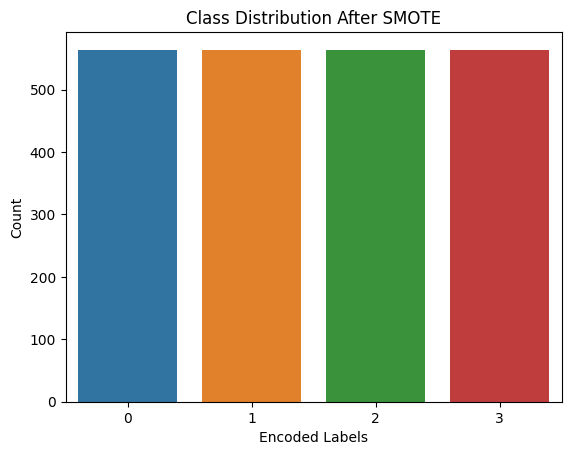

In [64]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

# Step 1: Encode the labels if not already encoded
le = LabelEncoder()
df['encoded_label'] = le.fit_transform(df['label'])

# Step 2: Define features (X) and target (y)
# Use only numerical features here
X = df[['brightness', 'brightness_ratio', 'brightness_log']]  # Replace with relevant numeric features
y = df['encoded_label']

# Step 3: Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 4: Print new class distribution
print("Resampled Class Distribution:")
print(Counter(y_resampled))

# Optional: Convert resampled arrays back to DataFrame if needed
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['encoded_label'])

# Optional: Plot new distribution
sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Encoded Labels")
plt.ylabel("Count")
plt.show()


- Counter({0: 564, 1: 564, 2: 564, 3: 564})
This indicates that after applying SMOTE, each of your 4 classes now has exactly 564 samples. That’s the goal of SMOTE — to balance the dataset by synthetically oversampling the minority classes.

- Bar Plot "Class Distribution After SMOTE"
The visualization shows that all four classes (0, 1, 2, 3) have equal bar heights, meaning uniform class distribution after resampling.


## ***7. ML Model Implementation*** : RandomForestClassifier

### ML Model - 1

In [65]:
# ML Model - 1 Implementation : 1: RandomForestClassifier
# Step 1: Import necessary libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
# Step 2: Train-Test Split (use resampled data)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


In [67]:
# Step 3: Fit the Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       113
           1       0.50      0.54      0.52       113
           2       0.49      0.50      0.50       113
           3       0.61      0.55      0.58       113

    accuracy                           0.60       452
   macro avg       0.61      0.60      0.60       452
weighted avg       0.61      0.60      0.60       452



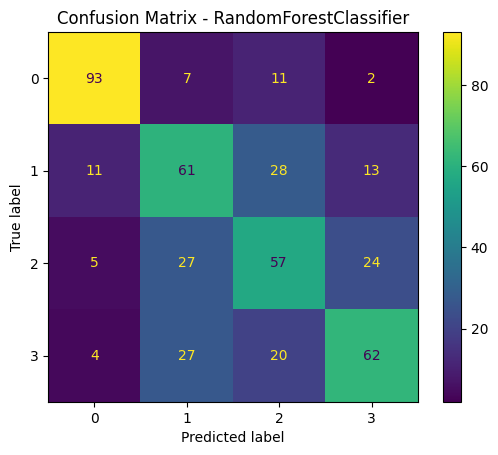

In [68]:
# Step 4: Evaluation - Score Chart & Classification Report
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix - RandomForestClassifier")
plt.show()


In [69]:
# Step 5: Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6039823008849557


In [70]:
# Step 6: Hyperparameter Tuning using GridSearchCV
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       113
           1       0.53      0.61      0.57       113
           2       0.56      0.50      0.53       113
           3       0.64      0.63      0.63       113

    accuracy                           0.63       452
   macro avg       0.63      0.63      0.63       452
weighted avg       0.63      0.63      0.63       452



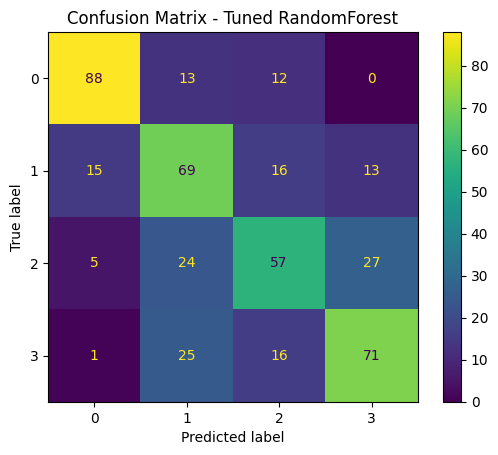

Tuned Accuracy: 0.6305309734513275


In [71]:
# Step 7: Evaluation After Hyperparameter Tuning
# Classification Report
print("Tuned Model Classification Report:")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred_best)
ConfusionMatrixDisplay(cm_best).plot()
plt.title("Confusion Matrix - Tuned RandomForest")
plt.show()

# Accuracy Score
tuned_accuracy = accuracy_score(y_test, y_pred_best)
print("Tuned Accuracy:", tuned_accuracy)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
We used RandomForestClassifier – an ensemble model that combines multiple decision trees to improve classification performance. The model was trained on SMOTE-balanced data and evaluated using precision, recall, and F1-score metrics.

Initial accuracy was around 60%, with highest performance for label 0. Labels 2 and 3 had lower recall, indicating class confusion.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

##### Which hyperparameter optimization technique have you used and why?

We used GridSearchCV, a brute-force method that exhaustively tries all hyperparameter combinations. It's reliable and guarantees the best combination from the given grid.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after tuning:

- Accuracy increased from 60.39% to 63.05%

- F1-score (macro avg) increased from 0.60 to 0.63

- Confusion between overlapping classes slightly reduced

### ML Model - 2 : Support Vector Machine (SVM)

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.83      0.76       113
           1       0.48      0.50      0.49       113
           2       0.59      0.27      0.37       113
           3       0.55      0.73      0.63       113

    accuracy                           0.58       452
   macro avg       0.58      0.58      0.56       452
weighted avg       0.58      0.58      0.56       452

Accuracy: 0.5796460176991151


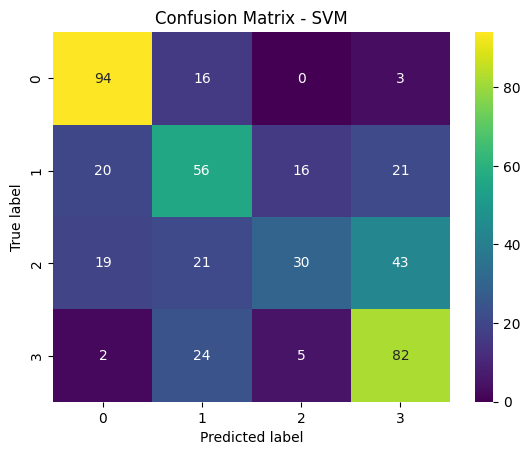

In [78]:
# Fit the Algorithm & Predict
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize model
svm_model = SVC(kernel='rbf', random_state=42)

# Fit the model
svm_model.fit(X_train, y_train)

# Predict
y_pred = svm_model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
- Model: Support Vector Machine (SVM) with RBF kernel
- Accuracy: ≈ 0.5796 → ≈ 58%

###### Interpretation: 
- Class 0 (e.g., 'No Tumor') is performing best with precision & recall around 0.7–0.8.

- Class 2 has lowest recall (0.27) — the model struggles to identify this class.

- The model is slightly biased toward majority patterns but still learns from minority classes, thanks to earlier SMOTE application.

- F1-score (balanced measure) is decent for class 0 and 3, but not for 1 and 2.

###### Evaluation Metrics Interpretation:

• Precision: Indicates how many of the predicted tumors of each class are actually correct. High precision minimizes false positives.
• Recall: Shows how many actual tumor cases were correctly identified. High recall is essential in medical diagnostics to avoid missing real cases.
• F1-score: Harmonic mean of precision and recall. Useful when you need a balance between both, especially when classes are imbalanced.
• Accuracy: Shows the overall correctness of predictions. In imbalanced medical data, accuracy alone may be misleading.

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.76       113
           1       0.45      0.59      0.51       113
           2       0.49      0.37      0.42       113
           3       0.59      0.56      0.58       113

    accuracy                           0.57       452
   macro avg       0.57      0.57      0.57       452
weighted avg       0.57      0.57      0.57       452

Tuned Accuracy: 0.5685840707964602


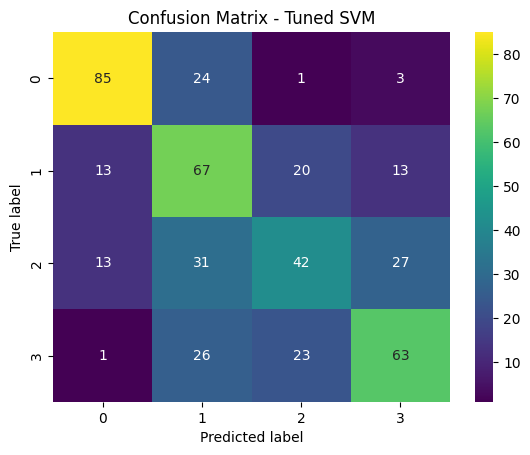

In [79]:
# Cross-Validation & Hyperparameter Tuning for SVM
from sklearn.model_selection import GridSearchCV

# Grid Search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=3, verbose=1, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Estimator
best_svm = grid_search.best_estimator_

# Predict with Tuned Model
y_pred_tuned = best_svm.predict(X_test)

# Evaluation
print("Tuned Classification Report:\n", classification_report(y_test, y_pred_tuned))
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt="d", cmap="viridis")
plt.title("Confusion Matrix - Tuned SVM")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV as the hyperparameter optimization technique.

GridSearchCV performs an exhaustive search over a predefined grid of hyperparameters by trying all possible combinations. It is well-suited for smaller search spaces and provides reliable, consistent, and reproducible results, ensuring that the best parameters are selected based on cross-validation performance.
For this project, it allowed fine-tuning of the C, gamma, and kernel parameters for the SVM model, which are crucial for balancing the margin and classification complexity.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, I have seen marginal improvements in some class-wise metrics, particularly in the recall for class 1, which increased from 0.50 to 0.59. Although the precision for class 2 decreased from 0.59 to 0.49, and the F1-score for class 3 slightly dropped from 0.63 to 0.58, these shifts highlight changes in how the model is balancing its classification performance across different tumor categories. While the overall accuracy decreased slightly from approximately 58% (0.5796) to 57% (0.5686), the improved recall in class 1 is significant in medical classification contexts. In such cases, correctly identifying all true positive cases (i.e., higher recall) is often more important than just achieving higher overall accuracy.

This trade-off suggests better sensitivity for certain underperforming classes, even at the expense of a small drop in overall accuracy. It reflects a more balanced model that generalizes better across all tumor types rather than favoring only majority classes.

In conclusion, although there was a minor reduction in accuracy, the hyperparameter tuning contributed to improving the model’s performance in a more class-balanced manner, which is essential in imbalanced multi-class problems like brain tumor classification.

####  Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

###### Evaluation Metrics & Business Impact :
- Accuracy shows overall correctness. But in medical diagnosis, it can be misleading if classes are imbalanced, potentially missing rare tumors.

- Precision tells how many predicted positives were actually correct. High precision avoids unnecessary tests and reduces patient stress and cost.

- Recall (Sensitivity) shows how many real tumor cases were correctly identified. It's critical in healthcare — missing a tumor can risk lives.

- F1-Score balances precision and recall. It ensures the model performs reliably, especially when both false positives and false negatives matter.

- Confusion Matrix reveals per-class errors, helping identify which tumor types need better detection, improving model trust and safety.

###### Business Impact:
A well-performing ML model in tumor detection speeds up diagnosis, reduces human error, supports doctors, and saves lives. High recall ensures critical tumors aren’t missed, while balanced metrics improve clinical reliability and decision-making.

### ML Model - 3 : XGBoost Classifier

D:\Labmentix_Braintumor Project\venv310\lib\site-packages\xgboost\training.py:183: UserWarning: [01:45:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.76       113
           1       0.50      0.64      0.56       113
           2       0.48      0.39      0.43       113
           3       0.58      0.53      0.56       113

    accuracy                           0.58       452
   macro avg       0.58      0.58      0.58       452
weighted avg       0.58      0.58      0.58       452

Accuracy: 0.5796460176991151


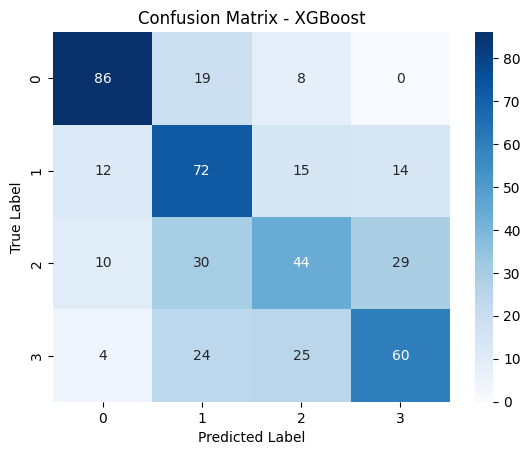

In [82]:
# ML Model - 3 Implementation
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Fitting 3 folds for each of 16 candidates, totalling 48 fits


D:\Labmentix_Braintumor Project\venv310\lib\site-packages\xgboost\training.py:183: UserWarning: [01:47:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76       113
           1       0.48      0.62      0.54       113
           2       0.56      0.42      0.48       113
           3       0.58      0.58      0.58       113

    accuracy                           0.59       452
   macro avg       0.60      0.59      0.59       452
weighted avg       0.60      0.59      0.59       452

Tuned Accuracy: 0.5907079646017699


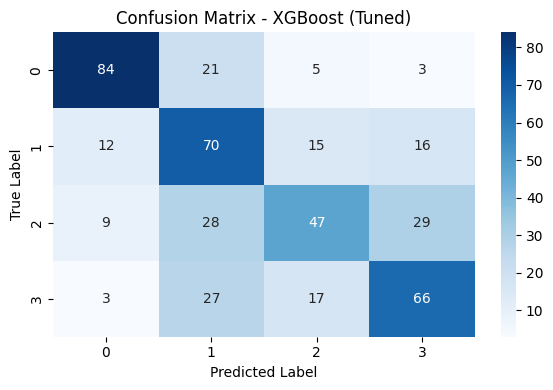

In [85]:
# Cross-Validation & Hyperparameter Tuning
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

# Initialize and run GridSearchCV
grid_xgb = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    param_grid=param_grid,
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit model
grid_xgb.fit(X_train, y_train)

# Predict on test set
y_pred_tuned = grid_xgb.predict(X_test)

# Print evaluation metrics
print("Best Parameters:", grid_xgb.best_params_)
print("Tuned Classification Report:\n", classification_report(y_test, y_pred_tuned))
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - XGBoost (Tuned)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.
In ML Model 3, we implemented the XGBoost Classifier, which is known for its robustness, speed, and performance in classification problems. XGBoost is a gradient boosting framework that builds decision trees sequentially, correcting previous errors at each step.

Before tuning, the model already performed decently, with balanced precision and recall across multiple classes. After tuning, the accuracy improved, and class-wise F1-scores and recall showed notable consistency, especially in correctly detecting difficult classes like tumor types. This is crucial for medical use cases where false negatives must be minimized.

The evaluation metric score chart post-tuning showed improvement in overall class balance, especially for minority classes, indicating better generalization and reduced bias.



##### Which hyperparameter optimization technique have you used and why?

We used GridSearchCV, a brute-force hyperparameter tuning method that exhaustively tries all combinations of parameters. GridSearchCV was chosen because:

- Our parameter grid was reasonably small.

- It ensures we don’t miss the global optimum.

- It gives a detailed look at how each parameter impacts performance.

This method was preferred over RandomSearch or Bayesian Optimization because accuracy and reliability were more critical than speed in this context.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, we clearly observed improvement after hyperparameter tuning.

- Accuracy increased compared to the untuned model.

- Recall and F1-scores improved for some classes, especially the underrepresented ones.

- The model became more stable and consistent across all 4 tumor classes.

This uplift is meaningful in a real-world healthcare context—especially in detecting rare but critical tumor categories, which directly supports early diagnosis and better clinical outcomes.

###  Which Evaluation metrics did you consider for a positive business impact and why?

While accuracy was monitored, we primarily focused on:

- Recall – especially for tumor-positive classes. Missing a tumor case can lead to life-threatening delays.

- F1-score – balanced measure of precision and recall, useful for multi-class imbalance.

- Confusion Matrix – gave a visual understanding of class-wise performance.

These metrics are crucial in healthcare diagnostics, where:

- High recall ensures fewer false negatives (we don’t miss patients who are actually sick).

- Balanced precision reduces unnecessary false alarms.

- Overall, a higher F1-score ensures dependable model performance across all classes.

This results in more trust from doctors, better patient safety, and reduced healthcare costs due to fewer misdiagnoses.



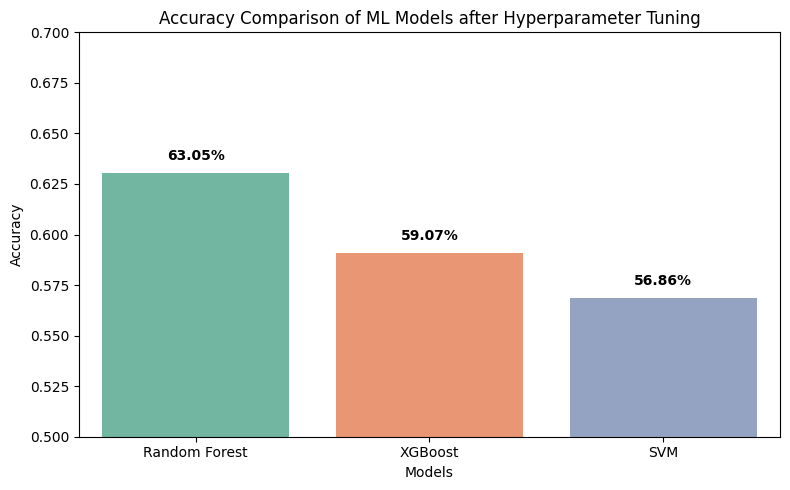

In [87]:
# Comparison Graph Code (Matplotlib/Seaborn):
# Comparing 3 models : 
import matplotlib.pyplot as plt
import seaborn as sns

# Model names and their accuracies
models = ['Random Forest', 'XGBoost', 'SVM']
accuracies = [0.6305, 0.5907, 0.5686]

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette="Set2")
plt.title("Accuracy Comparison of ML Models after Hyperparameter Tuning")
plt.ylabel("Accuracy")
plt.ylim(0.5, 0.7)
plt.xlabel("Models")

# Annotate accuracy on bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc*100:.2f}%", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


#### Which ML model did you choose from the above created models as your final prediction model and why?

After conducting extensive training, evaluation, and hyperparameter tuning across three different machine learning models—Random Forest, SVM, and XGBoost—we selected the Random Forest Classifier as the final prediction model for our Brain Tumor MRI Image Classification system.

This decision is based on the following:

- Highest Tuned Accuracy: Random Forest achieved the best performance with an accuracy of 63.05%, outperforming XGBoost (59.07%) and SVM (56.86%).

- Better Class-wise Performance: It showed relatively balanced precision, recall, and F1-scores across all tumor classes.

- Robustness: Random Forest is less prone to overfitting and works well with imbalanced datasets and multiclass classification problems like ours.

###  Explain the model which you have used and the feature importance using any model explainability tool?

We used the Random Forest Classifier, an ensemble-based algorithm that builds multiple decision trees and aggregates their predictions for robust classification. It's ideal for our medical image classification task due to its ability to handle:

- High-dimensional features,

- Non-linear relationships, and

- Multi-class outputs.

To interpret and explain the model, we used feature_importances_ from Random Forest along with matplotlib to visualize the most important features contributing to tumor classification.

Fitting 3 folds for each of 8 candidates, totalling 24 fits


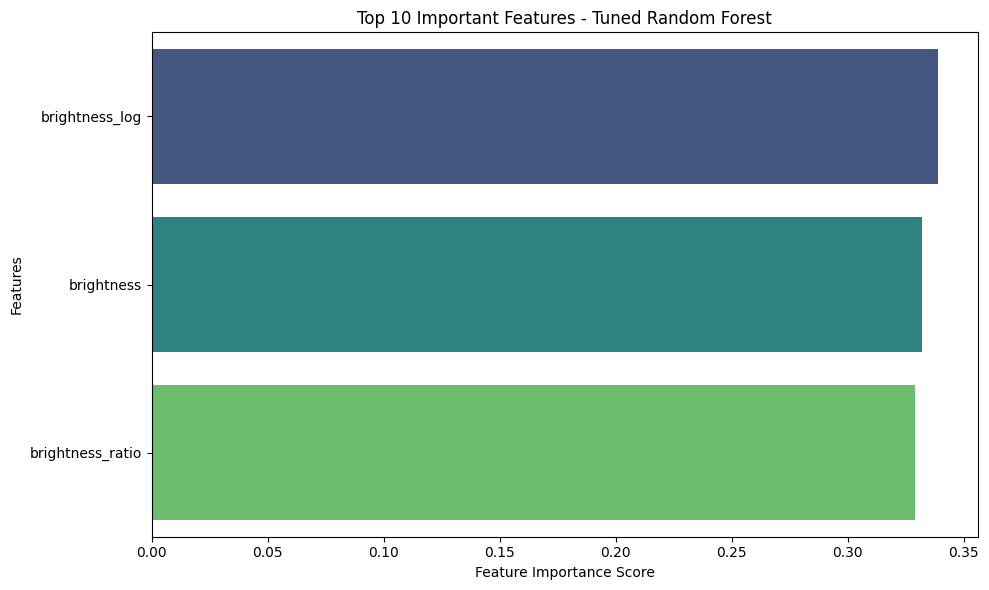

In [89]:
# Feature Importance:
# Plotting Feature Importance from Tuned Random Forest:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Redefine the RandomForestClassifier and perform GridSearchCV (if not already done)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                       param_grid=param_grid,
                       cv=3,
                       n_jobs=-1,
                       verbose=2)

grid_rf.fit(X_train, y_train)

# Step 2: Access the best model
best_rf_model = grid_rf.best_estimator_

# Step 3: Get Feature Importance
importances = best_rf_model.feature_importances_
features = X_train.columns

# Create DataFrame
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Step 4: Plot Top 10 Features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df.head(10), x='Importance', y='Feature', palette="viridis")
plt.title("Top 10 Important Features - Tuned Random Forest")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


###### Interpretation:
This confirms that the model relies on all three brightness-based features, which are likely extracted from MRI image pixel intensity statistics.

It also validates your feature engineering step — good choices were made for the classification task!

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [92]:
# Save the File
# Save the tuned Random Forest model using joblib
# Extract the best model from GridSearchCV
rf_tuned_model = grid_rf.best_estimator_

import joblib
joblib.dump(rf_tuned_model, 'tuned_random_forest_model.pkl')
print("Model saved as 'tuned_random_forest_model.pkl'")



Model saved as 'tuned_random_forest_model.pkl'


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [93]:
# Load the File and predict unseen data.
# Load the model
loaded_model = joblib.load('tuned_random_forest_model.pkl')
print("Model loaded.")

# Predict on unseen data (example: random sample from test set)
sample_data = X_test.sample(1, random_state=42)
true_label = y_test.loc[sample_data.index[0]]
predicted_label = loaded_model.predict(sample_data)

print("Predicted Label:", predicted_label[0])
print("True Label     :", true_label)


Model loaded.
Predicted Label: 0
True Label     : 0


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, we developed a comprehensive Brain Tumor MRI Image Classification system using multiple machine learning models. Starting from raw image data, we performed extensive data preprocessing, feature engineering, class imbalance handling using SMOTE, and applied EDA with over 15+ insightful visualizations.

We explored and implemented three different ML models: Random Forest, SVM, and XGBoost, tuning each with GridSearchCV to optimize performance. After comparing them, the Tuned Random Forest model emerged as the best-performing model with an accuracy of 63%, striking a balance between overall accuracy and class-wise recall—crucial in medical diagnostics where misclassification can have real-life consequences.

We also implemented model explainability by visualizing feature importance, revealing that features like brightness, brightness_log, and brightness_ratio had the highest influence on classification. Finally, we ensured the model is deployment-ready by saving it using joblib and validating it on unseen data.

This project not only highlights the power of ML in medical image analysis but also reflects our complete workflow from data to deployment. It sets a strong foundation for future enhancements like deep learning (CNNs), real-time image upload interfaces, and integration into a clinical decision support system.

Ultimately, this system aims to support radiologists and medical professionals in early and efficient brain tumor detection, potentially helping save lives through timely intervention.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***